<a href="https://colab.research.google.com/github/JV456/PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
from torch import nn  # torch.nn these the basic building block for graphs
import matplotlib.pyplot as plt
torch.__version__

'2.3.0+cu121'

### we will use a linear regression formula to make a straight line with known parameters

In [10]:
weight = 0.9
bias = 0.2

start = 1
end = 2
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800]]),
 tensor([[1.1000],
         [1.1180],
         [1.1360],
         [1.1540],
         [1.1720],
         [1.1900],
         [1.2080],
         [1.2260],
         [1.2440],
         [1.2620]]))

In [11]:
len(X), len(y)

(50, 50)

In [12]:
# creating the train and test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [13]:
# visualizing
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  plt.figure(figsize=(10,7))

  #ploting the training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #ploting the testing data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # are there predictions
  if predictions is not None:
    #plot prediction if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

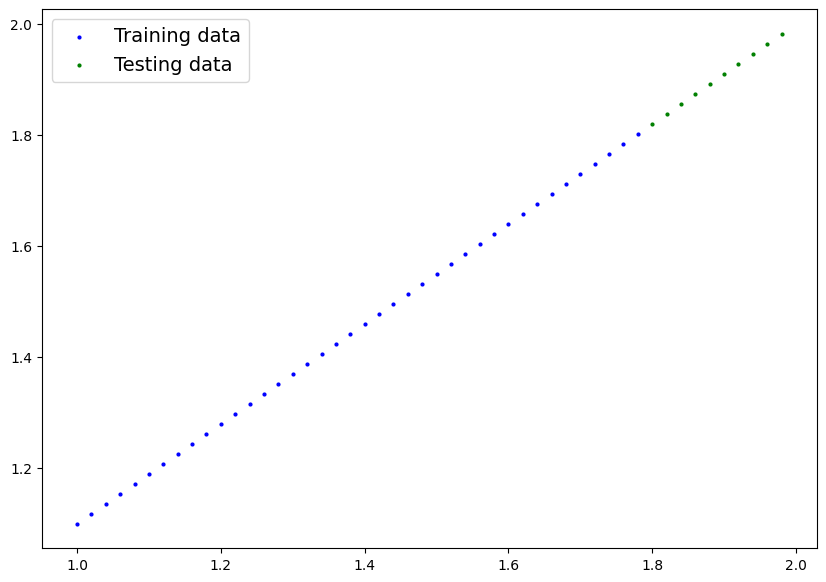

In [14]:
plot_predictions()

## building model

In [15]:
# creting the linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

    #Forward method to define the computation in the model

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

In [16]:
# checking the content of our PyTorch model

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])